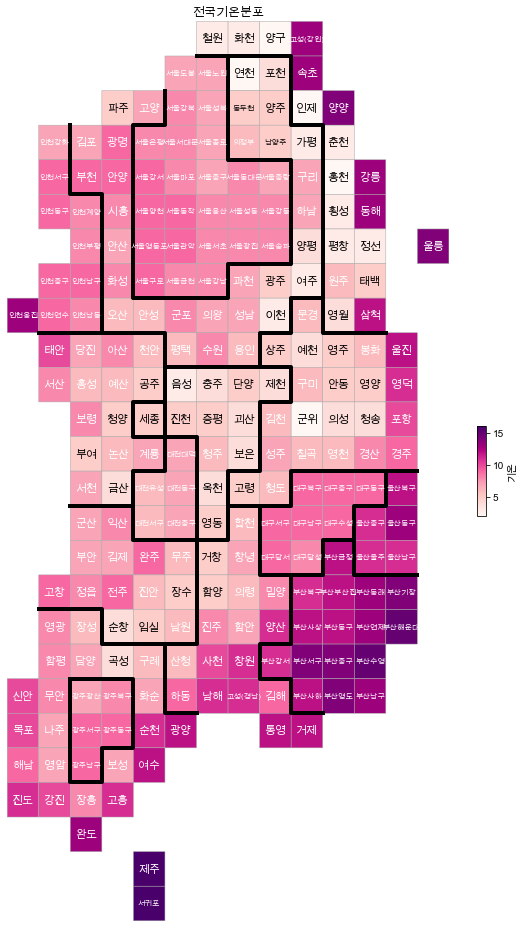

In [5]:
#_*_coding:utf-8 _*_

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager
import pandas as pd

font_location="/Library/Fonts/Arial unicode.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False 


def showMap(blockedMap, targetData, strTitle, strColor, gamma):

    BORDER_LINES = [
        [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
        [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
        [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
         (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
        [(9, 12), (9, 10), (8, 10)], # 강원도
        [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
         (13, 4), (14, 4), (14, 2)], # 충청남도
        [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
         (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
        [(14, 4), (15, 4), (15, 6)], # 대전시
        [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
        [(14, 8), (16, 8), (16, 10), (15, 10),
         (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
        [(15, 11), (16, 11), (16, 13)], # 울산시
        [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
        [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
        [(18, 5), (20, 5), (20, 6)], # 전라남도
        [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
    ]

    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])
    datalabel = targetData
    
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    cmapname = strColor
    plt.figure(figsize=(8, 13))
    plt.title(strTitle)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        dispname = row['shortName']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 7.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(targetData)
    plt.tight_layout()
    
    plt.savefig('./temp/' + targetData + '.png')

    plt.show()
    
data_korea = pd.read_csv('./temp/data_weather_degree11.csv', index_col=0, encoding='utf-8')
data_korea.index = data_korea.apply(lambda r:r[u'광역시도']+''+r[u'행정구역'],axis=1)
showMap(data_korea,u'기온',u'전국기온분포','RdPu',0.75)
